In [37]:
## IMPORT NECESSARY LIBRARIES
from google.colab import files
import pandas as pd
import numpy as np
from keras import models, layers
import matplotlib.pyplot as plt

In [38]:
## GETTING THE DATA
uploaded = files.upload()

Saving bankrupcy.csv to bankrupcy (3).csv


In [39]:
## READING THE DATA
df = pd.read_csv('bankrupcy.csv')
df.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [40]:
## SEPARATING THE FEATURES AND TARGET VARIABLES
X = df.iloc[:, 1:]
X.head()


,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,Continuous interest rate (after tax),...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,0.780985,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,0.781506,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,0.780284,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,0.781241,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,0.781550,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [41]:
X.shape


(6819, 95)

In [42]:
y = df.iloc[:, 0:1]
y.head()

,Bankrupt?
0,1
1,1
2,1
3,1
4,1


In [43]:
## CONSTRUCTING THE NETWORK
model = models.Sequential()
model.add(layers.Dense(8, input_dim = 95, activation = 'relu' ))
model.add(layers.Dense(16, activation = 'elu'))
model.add(layers.Dense(16, activation = 'elu'))
model.add(layers.Dense(8, activation = 'elu'))
model.add(layers.Dense(1, activation = 'sigmoid'))
print(model.summary())




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 8)                 768       
                                                                 
 dense_16 (Dense)            (None, 16)                144       
                                                                 
 dense_17 (Dense)            (None, 16)                272       
                                                                 
 dense_18 (Dense)            (None, 8)                 136       
                                                                 
 dense_19 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1329 (5.19 KB)
Trainable params: 1329 (5.19 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
None


In [44]:
## COMPILING THE MODEL
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [45]:
## FITTING THE MODEL OR TRAINING THE NETWORK
hist = model.fit(X, y, epochs = 50)

Epoch 1/50
214/214 [==============================] - 1s 2ms/step - loss: 2164754.5000 - accuracy: 0.9396
Epoch 2/50
214/214 [==============================] - 0s 2ms/step - loss: 389375.7500 - accuracy: 0.9380
Epoch 3/50
214/214 [==============================] - 0s 2ms/step - loss: 314298.1250 - accuracy: 0.9396
Epoch 4/50
214/214 [==============================] - 0s 2ms/step - loss: 209766.0156 - accuracy: 0.9415
Epoch 5/50
214/214 [==============================] - 0s 2ms/step - loss: 154355.1250 - accuracy: 0.9418
Epoch 6/50
214/214 [==============================] - 0s 2ms/step - loss: 113180.3828 - accuracy: 0.9419
Epoch 7/50
214/214 [==============================] - 0s 2ms/step - loss: 111834.6953 - accuracy: 0.9384
Epoch 8/50
214/214 [==============================] - 0s 2ms/step - loss: 113385.6406 - accuracy: 0.9412
Epoch 9/50
214/214 [==============================] - 0s 2ms/step - loss: 83992.5000 - accuracy: 0.9412
Epoch 10/50
214/214 [==============================] - 

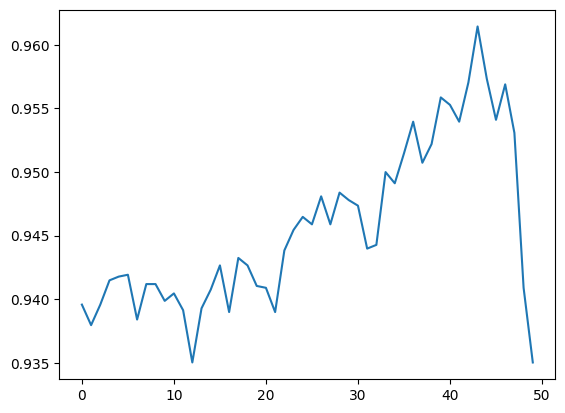

In [46]:
## DISPLAYING THE ACCURACY
plt.plot(hist.history['accuracy'])
plt.show()

In [47]:
## INLINE PREDICTION
y_pr = model.predict(X)

214/214 [==============================] - 0s 1ms/step


In [48]:
y_pred = np.round(y_pr)
y_pred

array([[0.],
       [0.],
       [0.],
       ...,
       [0.],
       [0.],
       [0.]], dtype=float32)